In [3]:
#Step_1:  Load and Inspect the Data
#Ensure you load the dataset and inspect its structure to understand its contents.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
dataPath = "./Data/TRAIN_Vehicles_Data.xlsx" #The route to the data
data = pd.read_excel(dataPath)

# Display basic info
print("Dataset Overview:")
print(data.info())  # Data types and non-null values

print("\nDescriptive Statistics:")
print(data.describe())  # Summary statistics for numerical columns

print("\nSample Data:")
print(data.head())  # Display the first few rows

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())





Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99071 entries, 0 to 99070
Columns: 106 entries, RPAKREP_VEHICLE_HKEY to SCALED_TOTAL_SALE_PRICE
dtypes: datetime64[ns](5), float64(42), object(59)
memory usage: 80.1+ MB
None

Descriptive Statistics:
            COMPANY       MILEAGE  OPERATING_HOURS  MILAGE_IN_FIELD  \
count  99040.000000  9.904000e+04     99040.000000          99038.0   
mean      22.375808  3.071296e+04         0.275535              1.0   
min       10.000000  0.000000e+00         0.000000              1.0   
25%       12.000000  1.000000e+01         0.000000              1.0   
50%       18.000000  5.285000e+03         0.000000              1.0   
75%       33.000000  2.694025e+04         0.000000              1.0   
max       72.000000  9.960005e+06     17140.000000              1.0   
std       13.131775  1.873386e+05        56.329787              0.0   

       MILAGE_SALES  OPERATING_HOURS_SALES  CERTIFICATE_TYPE_DATE  \
count  9.904000e+04    

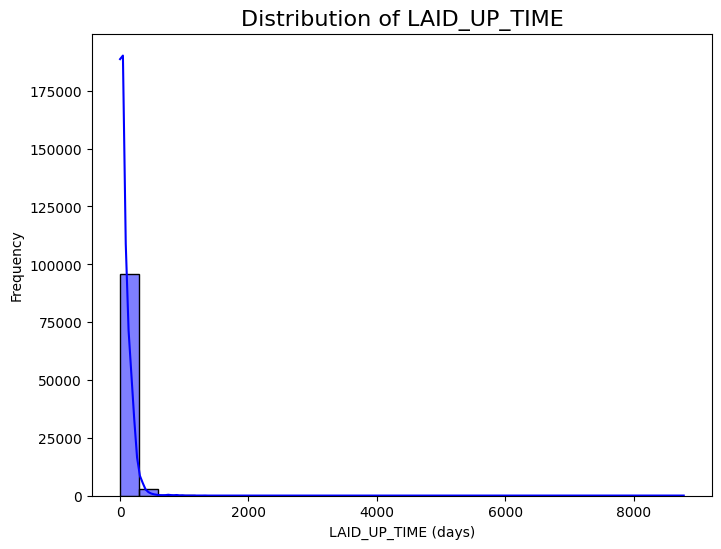

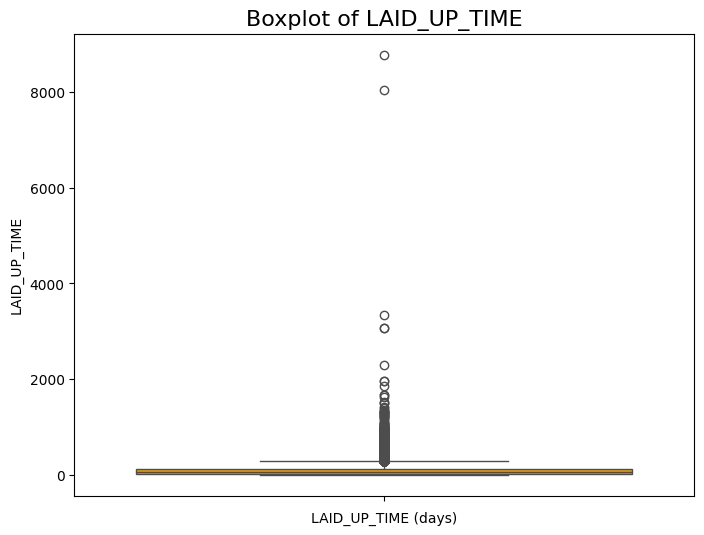

In [4]:
#Step 2: Visualizing the Target Variable
#Let’s analyze the distribution of LAID_UP_TIME and check for outliers.

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['LAID_UP_TIME'], kde=True, bins=30, color='blue')
plt.title("Distribution of LAID_UP_TIME", fontsize=16)
plt.xlabel("LAID_UP_TIME (days)")
plt.ylabel("Frequency")
plt.show()

# Check for outliers using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data['LAID_UP_TIME'], color='orange')
plt.title("Boxplot of LAID_UP_TIME", fontsize=16)
plt.xlabel("LAID_UP_TIME (days)")
plt.show()


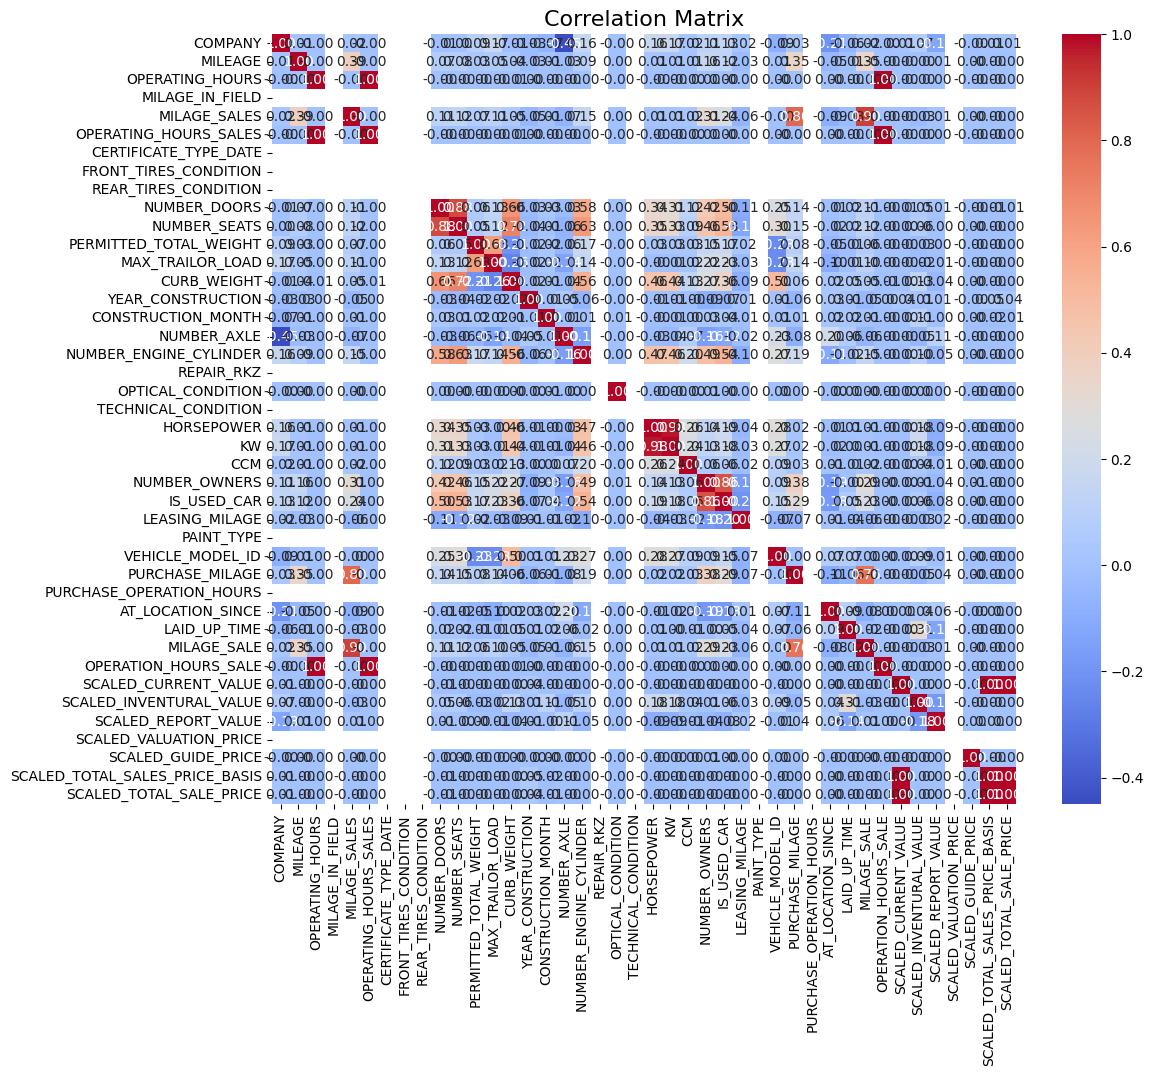

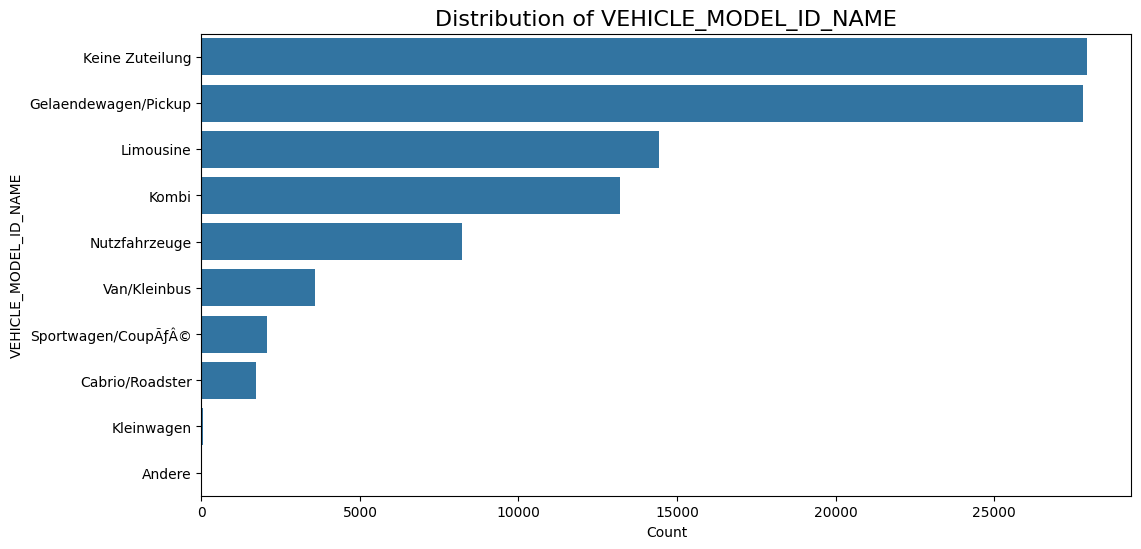

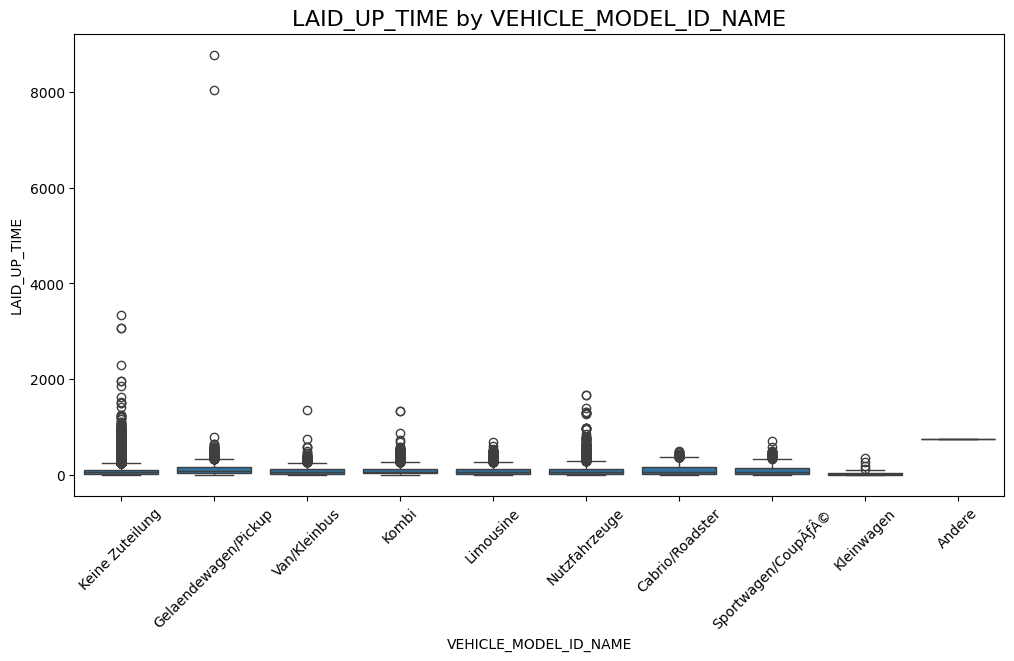

In [5]:
#Step 3: Analyze Features
#Correlation Heatmap for Numerical Features

# Correlation matrix for numerical features
numerical_features = data.select_dtypes(include=[np.number])  # Select numerical columns
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

#Categorical Feature Distribution
#For features like VEHICLE_MODEL_ID_NAME, we analyze their distribution and relationship with LAID_UP_TIME.

# Example: Distribution of VEHICLE_MODEL_ID_NAME
plt.figure(figsize=(12, 6))
sns.countplot(y=data['VEHICLE_MODEL_ID_NAME'], order=data['VEHICLE_MODEL_ID_NAME'].value_counts().index)
plt.title("Distribution of VEHICLE_MODEL_ID_NAME", fontsize=16)
plt.xlabel("Count")
plt.ylabel("VEHICLE_MODEL_ID_NAME")
plt.show()

# Relationship with LAID_UP_TIME
plt.figure(figsize=(12, 6))
sns.boxplot(x='VEHICLE_MODEL_ID_NAME', y='LAID_UP_TIME', data=data)
plt.title("LAID_UP_TIME by VEHICLE_MODEL_ID_NAME", fontsize=16)
plt.xlabel("VEHICLE_MODEL_ID_NAME")
plt.ylabel("LAID_UP_TIME")
plt.xticks(rotation=45)
plt.show()


In [7]:
#Step 4: Data Cleaning and Preprocessing
#handle missing values and perform feature engineering

# Handle missing values
# Numerical columns: Fill with mean


num_cols = data.select_dtypes(include=[np.number]).columns
for col in num_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mean())  # Assign back to the column

# Categorical columns: Fill with mode
cat_cols = data.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])  # Assign back to the column

print("Missing values handled successfully!")


#Date Processing

# Process date columns if any
if 'DAY_OF_REGISTRATION' in data.columns:
    data['DAY_OF_REGISTRATION'] = pd.to_datetime(data['DAY_OF_REGISTRATION'], format='%Y%m%d', errors='coerce')
    data['REGISTRATION_YEAR'] = data['DAY_OF_REGISTRATION'].dt.year
    data['REGISTRATION_MONTH'] = data['DAY_OF_REGISTRATION'].dt.month
    data['REGISTRATION_DAY'] = data['DAY_OF_REGISTRATION'].dt.day
    data['REGISTRATION_WEEKDAY'] = data['DAY_OF_REGISTRATION'].dt.weekday
    data = data.drop(columns=['DAY_OF_REGISTRATION'])  # Drop original date column

print("Date processing completed!")


#One-Hot Encoding for Categorical Variables
# One-Hot Encoding and Handling High-Cardinality Features
# Identify high and low cardinality categorical columns
low_cardinality_cols = [col for col in cat_cols if data[col].nunique() < 20]  # Suitable for one-hot encoding
high_cardinality_cols = [col for col in cat_cols if data[col].nunique() >= 20]  # Handle separately

print(f"Low-cardinality columns: {low_cardinality_cols}")
print(f"High-cardinality columns: {high_cardinality_cols}")

# Apply one-hot encoding to low-cardinality categorical features
if low_cardinality_cols:
    data = pd.get_dummies(data, columns=low_cardinality_cols, drop_first=True)
    print("One-hot encoding applied to low-cardinality categorical features.")

# Apply frequency encoding to high-cardinality features
for col in high_cardinality_cols:
    freq_encoding = data[col].value_counts()
    data[col] = data[col].map(freq_encoding)
    print(f"Frequency encoding applied to high-cardinality column: {col}")

print("Categorical features processing completed!")



#Scaling Numerical Features

from sklearn.preprocessing import StandardScaler  # noqa: E402

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[num_cols])

# Replace scaled features in the dataset
data[num_cols] = scaled_features

print("Scaling of numerical features completed!")




Missing values handled successfully!
Date processing completed!
Low-cardinality columns: ['OFFICE_MAIN_BRAND', 'RIM_KEY', 'COLOR_CODE_NAME', 'COLOR_TYPE', 'UPHOLSTERY_CODE_ALT', 'CERTIFICATE_TYPE', 'TRANSMISSION_SHORT', 'TRANSMISSION_NAME', 'ACCIDENT_VEHICLE', 'FINANCING_TYPE', 'FINANCING_TYPE_NAME', 'KAT_VEHICLE', 'FUEL_TYPE', 'FUEL_TYPE_NAME', 'DRIVE_TYPE', 'DRIVE_TYPE_NAME', 'VEHICLE_MODEL_ID_NAME', 'COMMISSION_TYPE', 'COMMISSION_TYPE_NAME', 'DEMONSTRATION_STATUS', 'CUSTOMER_TYPE']
High-cardinality columns: ['RPAKREP_VEHICLE_HKEY', 'OFFICE', 'CHASSIS_NUMBER', 'MANUFACTURER_SHORT', 'MANUFACTURER', 'VEHICLE_GROUP', 'VEHICLE_TYPE', 'MODEL_CODE', 'VARIANT', 'COLOR_CODE', 'COLOR', 'UPHOLSTERY_CODE', 'UPHOLSTERY', 'FACTORY_NUMBER', 'ENGINE_ID', 'ENGINE_TYPE', 'ENGINE_ID_ALT', 'TRANSMISSION', 'TRANSMISSION_TYPE', 'TRANSMISSION_ID', 'RIMS', 'FRONT_TIRES', 'REAR_TIRES', 'COMMISSION_NUMBER', 'LEASING_CONTRACT_DATE', 'LEASING_START', 'LEASING_END', 'PURCHASE_DATE', 'PURCHASE_BOOKING_DATE', 'PR

d:\gits\BIP_Project\myenv\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\gits\BIP_Project\myenv\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\gits\BIP_Project\myenv\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [8]:
# Identify non-numeric columns in the feature set
non_numeric_cols = data.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns detected:", non_numeric_cols)
else:
    print("All columns are numeric.")

# Re-Encode Non-Numeric Columns
from sklearn.preprocessing import LabelEncoder  # noqa: E402

# Apply Label Encoding to non-numeric columns
for col in non_numeric_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(X[col].astype(str))  # Convert to string and encode

print("Re-encoding completed for non-numeric columns.")

#Full Preprocessing Pipeline

from sklearn.compose import ColumnTransformer  # noqa: E402
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # noqa: E402

# Define preprocessing for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  # Scale numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_numeric_cols)  # One-hot encode categorical columns
    ]
)

# Apply preprocessing to all data
data_preprocessed = preprocessor.fit_transform(data)






All columns are numeric.
Re-encoding completed for non-numeric columns.


d:\gits\BIP_Project\myenv\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\gits\BIP_Project\myenv\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\gits\BIP_Project\myenv\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [10]:
#Step 5: Train-Test Split and Model Training
#K-Fold Cross-Validation and Training

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define features and target
X = data.drop(columns=['LAID_UP_TIME', 'CHASSIS_NUMBER'])  # Exclude target and irrelevant columns
y = data['LAID_UP_TIME']

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Models to train
models = {
    
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}


# Initialize K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)

rmse_scores = []
for train_index, val_index in kf.split(data_preprocessed):
    # Split the preprocessed data
    X_train, X_val = data_preprocessed[train_index], data_preprocessed[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = model.predict(X_val)
    
    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

# Report average RMSE
avg_rmse = np.mean(rmse_scores)
print(f"Average RMSE across folds: {avg_rmse:.2f}")



Average RMSE across folds: 0.15
